# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

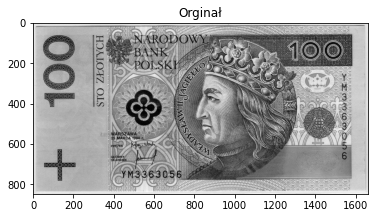

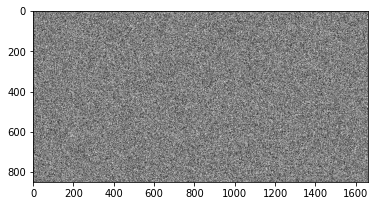

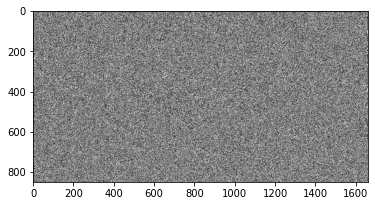

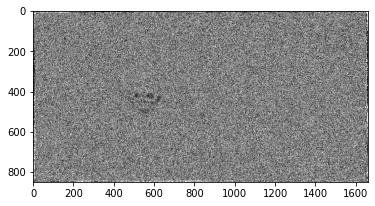

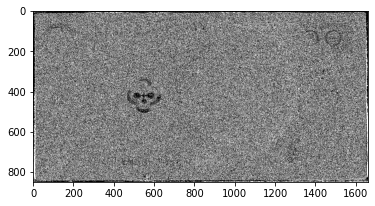

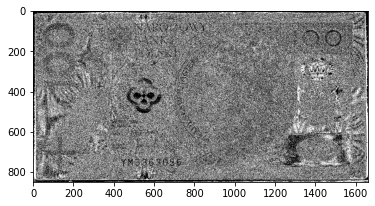

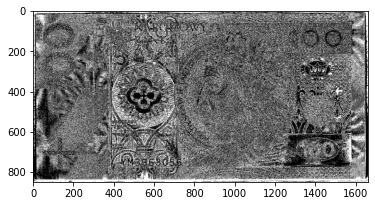

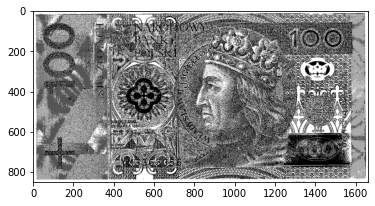

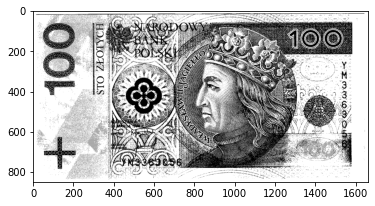

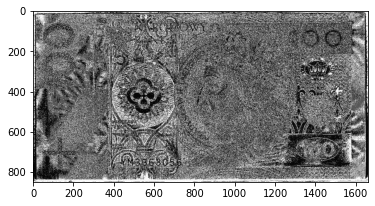

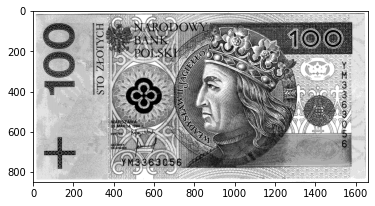

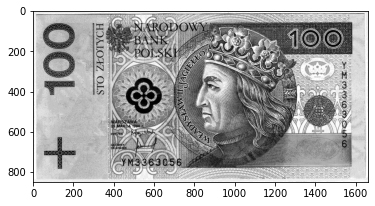

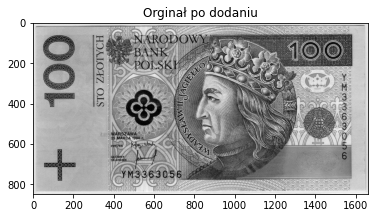

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

if not os.path.exists("100zloty.jpg"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg
        
zloty = cv2.imread('100zloty.jpg')

zloty = cv2.cvtColor(zloty, cv2.COLOR_RGB2GRAY)

plt.gray()
plt.title("Orginał")
plt.imshow(zloty)
plt.show()

array=[]

for i in range(8):
    plt.imshow(zloty >> i & 1)
    plt.show()
    array.append(zloty>>i & 1)
    
image1 = array[1] * 2**1 + array[5] * 2**5
plt.imshow(image1)
plt.show()

image2 = array[7] * 2**7 + array[6] * 2**6
plt.imshow(image2)
plt.show()

image3 = array[7] * 2**7 + array[6] * 2**6 + array[4] * 2**4
plt.imshow(image3)
plt.show()

original=0
for i in range(8):
    original += array[i] * 2**i
    
plt.imshow(original)
plt.title("Orginał po dodaniu")
plt.show()